Read File   

In [477]:

import pandas as pd
# DATA= './data/Piero'
DATA= './data/Mac' 
file = DATA+ "/ResultsALL.csv"

# Read the data into a data frame
df = pd.read_csv(file, sep=';')
# Remove the last column
df = df.iloc[:, :-1]

df5 = df[df['Test File'] == 'enctest5.bin'].reset_index(drop=True)
# get only sequential from df7
df5 = df5[df5['Kind'] == 'Sequential'].reset_index(drop=True)
# Get mean Total and Computation time for df7
df5 = df5.groupby(['Kind', 'File Size']).mean().reset_index()
# make all numerical columns int64 (only 1st is string)
df5[df5.columns[1:]] = df5[df5.columns[1:]].round(0).astype('int64')
Seq5Total = df5['Total'].to_numpy()
Seq5Comp = df5['Computation'].to_numpy()

df7 = df[df['Test File'] == 'enctest7.bin'].reset_index(drop=True)
# get only sequential from df7
df7 = df7[df7['Kind'] == 'Sequential'].reset_index(drop=True)
# Get mean Total and Computation time for df7
df7 = df7.groupby(['Kind', 'File Size']).mean().reset_index()
# make all numerical columns int64 (only 1st is string)
df7[df7.columns[1:]] = df7[df7.columns[1:]].round(0).astype('int64')
Seq7Total = df7['Total'].to_numpy()
Seq7Comp = df7['Computation'].to_numpy()


df = df.groupby(['Kind', 'File Size']).mean().reset_index()

df['File Size'] = (df['File Size']/1000000)
df['Encoding Size'] = (df['Encoding Size']/1000000)

dfSeq = df[df['Kind'] == 'Sequential'].reset_index(drop=True)
dfTP = df[df['Kind'] == 'ThreadPool'].reset_index(drop=True)
dfFF = df[df['Kind'] == 'FastFlow'].reset_index(drop=True)

dfTP['TPSpeedup'] = dfSeq['Total'] / dfTP['Total']
dfFF['FFSpeedup'] = dfSeq['Total'] / dfFF['Total']
dfTP['TPSpeedupC'] = dfSeq['Computation'] / dfTP['Computation']
dfFF['FFSpeedupC'] = dfSeq['Computation'] / dfFF['Computation']

# Absolute values
dfTP['TPSpeedup'] = dfTP['TPSpeedup'].to_numpy().round(0).astype('int64')
dfFF['FFSpeedup'] = dfFF['FFSpeedup'].to_numpy().round(0).astype('int64')
dfTP['TPSpeedupC'] = dfTP['TPSpeedupC'].to_numpy().round(0).astype('int64')
dfFF['FFSpeedupC'] = dfFF['FFSpeedupC'].to_numpy().round(0).astype('int64')
dfTP['IO'] = dfTP['Total'] - dfTP['Computation']
dfFF['IO'] = dfFF['Total'] - dfFF['Computation']
# print(dfTP)
# print(dfFF)
dfTP = dfTP.groupby(['Kind', 'File Size']).mean().reset_index()
dfFF = dfFF.groupby(['Kind', 'File Size']).mean().reset_index()
df = df.groupby(['Kind', 'File Size']).mean().reset_index()
df['Total'] = (df['Total']).round(0).astype('int64')
# If 0 then 1
dfFF['FFSpeedup'] = dfFF['FFSpeedup'].replace(0, 1)
dfTP['TPSpeedup'] = dfTP['TPSpeedup'].replace(0, 1)
dfFF['FFSpeedupC'] = dfFF['FFSpeedupC'].replace(0, 1)
dfTP['TPSpeedupC'] = dfTP['TPSpeedupC'].replace(0, 1)

# print(dfTP)
print(dfFF)


       Kind   File Size  Encoding Size    Nw   Tasks        Total  \
0  FastFlow     2.10592       1.119761   1.0     1.0      55612.5   
1  FastFlow    10.52960       5.598801   4.0    32.0      74940.5   
2  FastFlow    52.64800      27.994001  10.0    32.0     297970.2   
3  FastFlow   210.59200     111.976001  10.0   128.0    1021303.5   
4  FastFlow  1052.96000     559.880001  10.0   512.0    4809865.1   
5  FastFlow  2105.92000    1119.760001  10.0  1024.0    9433930.7   
6  FastFlow  4211.84000    2239.520001  10.0  2048.0   19326307.3   
7  FastFlow  8423.68000    4980.640001  10.0  4096.0  108065912.0   

   Computation  FFSpeedup  FFSpeedupC         IO  
0      51605.6        1.0         1.0     4006.9  
1      65148.9        3.0         3.0     9791.6  
2     254673.0        4.0         4.0    43297.2  
3     866105.6        4.0         5.0   155197.9  
4    4040686.5        5.0         5.0   769178.6  
5    7856626.5        5.0         6.0  1577304.2  
6   16096936.6       

/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/3728519615.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5 = df5.groupby(['Kind', 'File Size']).mean().reset_index()
/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/3728519615.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df7 = df7.groupby(['Kind', 'File Size']).mean().reset_index()
/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/3728519615.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eit

In [478]:
# df.to_csv('./data/df.csv', sep=';', index=False)
# dfFF.to_csv('./data/dfFF.csv', sep=';', index=False)
# dfTP.to_csv('./data/dfTP.csv', sep=';', index=False)
# dfSeq.to_csv('./data/dfSeq.csv', sep=';', index=False)

Plot difference between FastFlow and Sequential

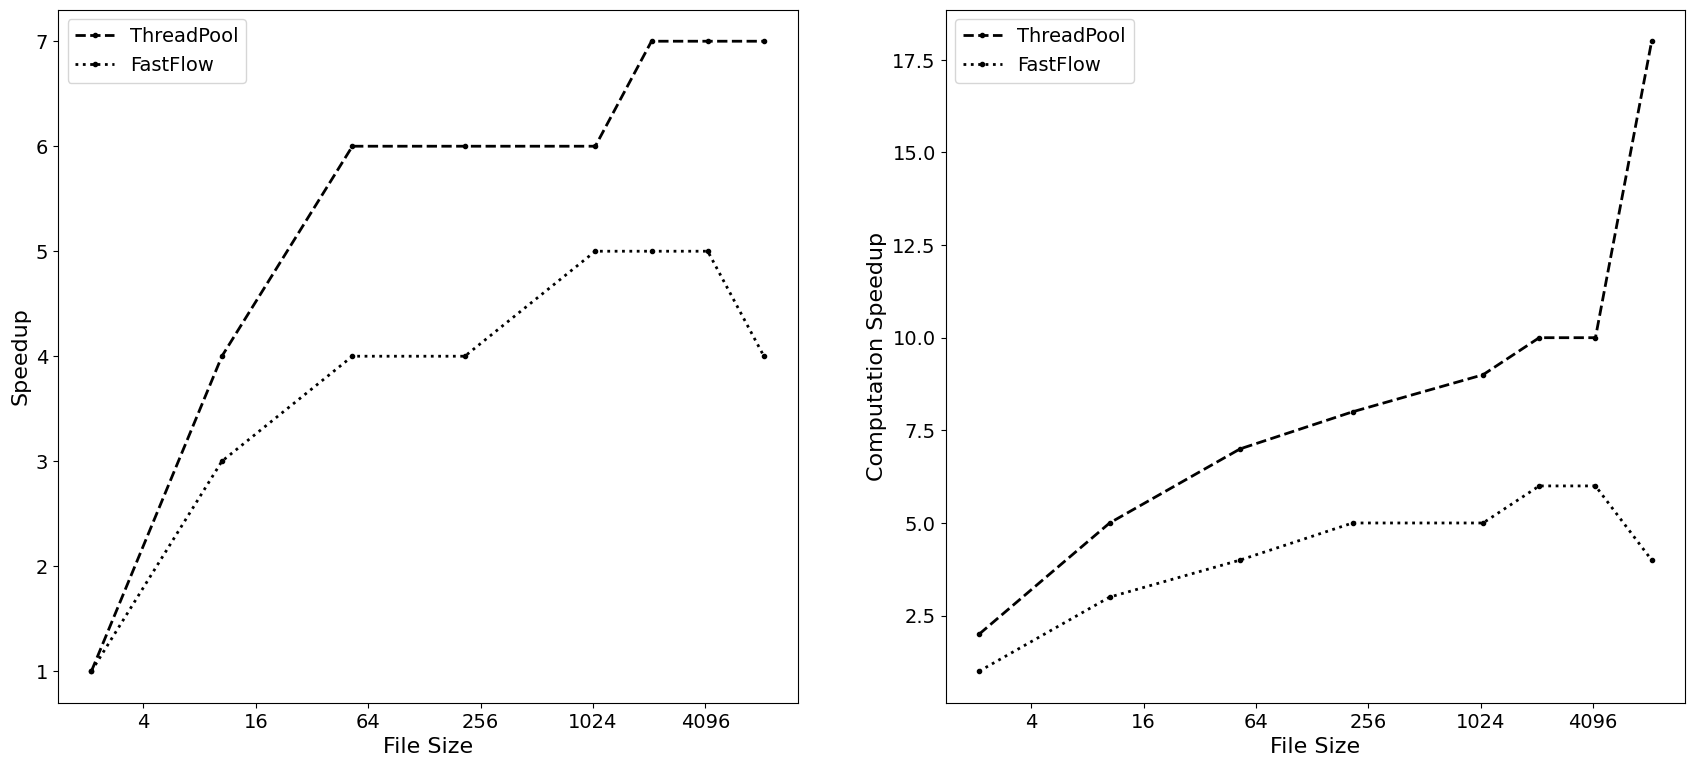

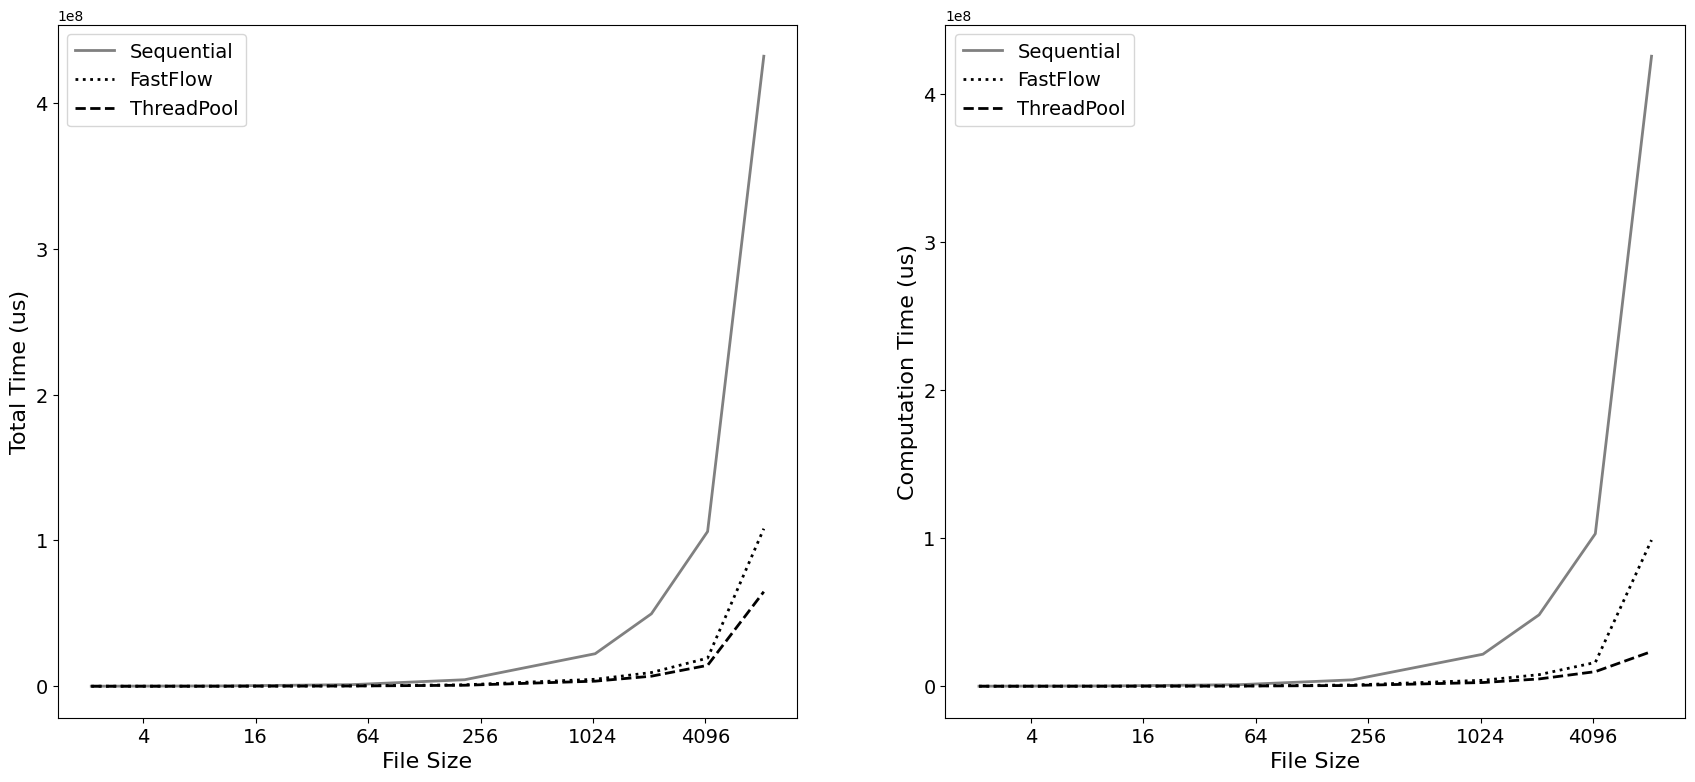

In [479]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter


def plotTotal(title, filename):
    # Plot
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(21, 9))
    # fig.suptitle(title)
    ax0.set_xlabel("File Size", color='black', fontsize=16)
    ax1.set_xlabel("File Size", color='black', fontsize=16)
    ax0.set_ylabel("Total Time (us)", color='black', fontsize=16)
    ax1.set_ylabel("Computation Time (us)", color='black', fontsize=16)
    
    # Plot
    ax0.plot(dfSeq['File Size'], dfSeq['Total'], label='Sequential', color='gray', linestyle='solid', linewidth=2)
    ax0.plot(dfFF['File Size'], dfFF['Total'], label='FastFlow', color='black', linestyle='dotted', linewidth=2)
    ax0.plot(dfTP['File Size'], dfTP['Total'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2)
    ax1.plot(dfSeq['File Size'], dfSeq['Computation'], label='Sequential', color='gray', linestyle='solid', linewidth=2)
    ax1.plot(dfFF['File Size'], dfFF['Computation'], label='FastFlow', color='black', linestyle='dotted', linewidth=2)
    ax1.plot(dfTP['File Size'], dfTP['Computation'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2)

    # Legend
    ax0.legend(fontsize=14)
    ax1.legend(fontsize=14)
    ax1.set_xscale('log', base=2)
    # ax1.set_yscale('log', base=2)
    ax0.set_xscale('log', base=2)
    # ax0.set_yscale('log', base=2)
    for axis in [ax1.xaxis, ax1.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    for axis in [ax0.xaxis, ax0.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    # Tick size
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    # Save
    fig.savefig(filename, bbox_inches='tight')
    
def plotSpeedup(title, filename):
    # Plot
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(21, 9))
    # fig.suptitle(title)
    ax0.set_xlabel("File Size", color='black', fontsize=16)
    ax1.set_xlabel("File Size", color='black', fontsize=16)
    ax0.set_ylabel("Speedup", color='black', fontsize=16)
    ax1.set_ylabel("Computation Speedup", color='black', fontsize=16)

    # Plot
    ax0.plot(dfTP['File Size'], dfTP['TPSpeedup'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
    ax0.plot(dfFF['File Size'], dfFF['FFSpeedup'], label='FastFlow', color='black', linestyle='dotted', linewidth=2, marker='.')
    ax1.plot(dfTP['File Size'], dfTP['TPSpeedupC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
    ax1.plot(dfFF['File Size'], dfFF['FFSpeedupC'], label='FastFlow', color='black', linestyle='dotted', linewidth=2, marker='.')

    # Legend
    ax0.legend(fontsize=14, loc='upper left')
    ax1.legend(fontsize=14, loc='upper left')
    # Ticks
    ax1.set_xscale('log', base=2)
    ax0.set_xscale('log', base=2)
    # ax1.set_yscale('log')
    # ax0.set_yscale('log')
    for axis in [ax1.xaxis, ax1.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    for axis in [ax0.xaxis, ax0.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    # Tick size
    ax0.tick_params(axis='both', which='major', labelsize=14)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    # Save
    fig.savefig(filename, bbox_inches='tight')
    
def plotIO(title, filename):
    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.set_xlabel("File Size")
    ax.set_ylabel("Speedup")

    # Plot
    ax.plot(dfTP['File Size'], dfTP['IO'], label='ThreadPool IO')
    ax.plot(dfFF['File Size'], dfFF['IO'], label='FastFlow IO')

    # Legend
    ax.legend()
    ax.set_yscale('log')

    # Save
    fig.savefig(filename, bbox_inches='tight')
    # fig.show()
    
plotSpeedup("Speedup", "plots/speedup.png")
plotTotal("Times", "plots/TOTAL.png")
# plotIO("IO", "plots/IO.png")

Read File for threads test 7     

/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/4237915446.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,Kind,Test File,File Size,Encoding Size,Nw,Tasks,Total,Computation,Ideal,IdealC,Speedup,SpeedupC
0,FastFlow,enctest7.bin,4212,2240,2,32768,50467983,46990396,2.0,2.0,2,2
1,ThreadPool,enctest7.bin,4212,2240,2,32768,48040458,36502576,2.0,2.0,2,3
2,FastFlow,enctest7.bin,4212,2240,4,16384,28462908,24391204,4.0,4.0,4,4
3,ThreadPool,enctest7.bin,4212,2240,4,16384,23969948,18232005,4.0,4.0,4,6
4,FastFlow,enctest7.bin,4212,2240,6,8192,28330748,23695672,6.0,6.0,4,4
5,ThreadPool,enctest7.bin,4212,2240,6,8192,21402154,13756657,6.0,6.0,5,7
6,FastFlow,enctest7.bin,4212,2240,8,8192,20753971,15765018,8.0,8.0,5,7
7,ThreadPool,enctest7.bin,4212,2240,8,8192,16437392,10438983,8.0,8.0,6,10
8,FastFlow,enctest7.bin,4212,2240,10,8192,23037788,19494448,10.0,10.0,5,5
9,ThreadPool,enctest7.bin,4212,2240,10,8192,16881984,10691606,10.0,10.0,6,10


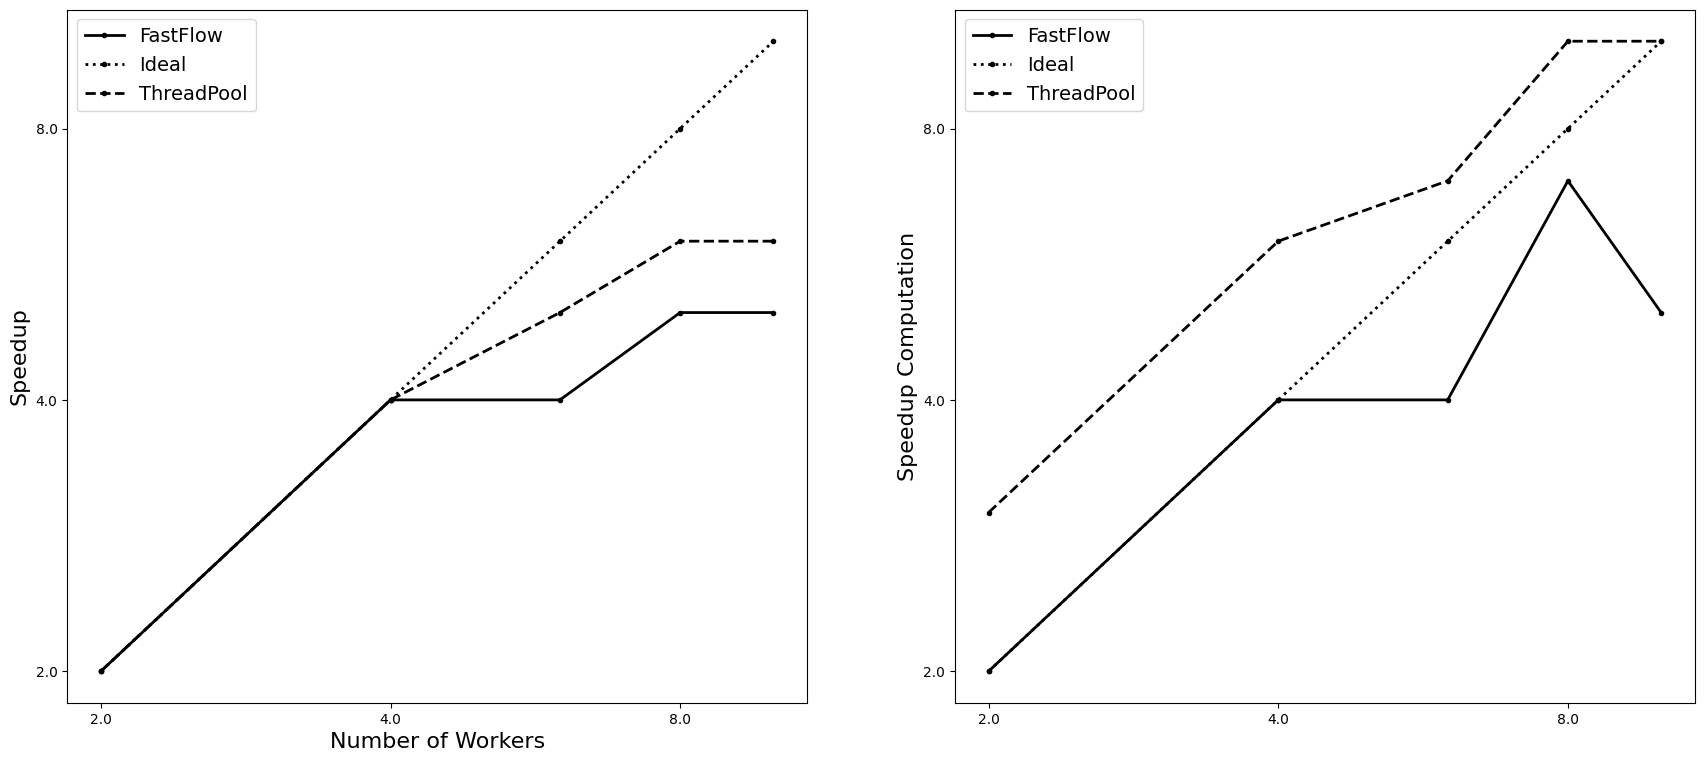

In [480]:
df2 = pd.read_csv(DATA+ '/Results.csv', sep=';')
df2 = df2.iloc[:, :-1]
# Get only test 7
df2 = df2[df2['Test File'] == 'enctest7.bin'].reset_index(drop=True)
# Absolute 
df2['Ideal'] = Seq7Total/(Seq7Total/df2['Nw'])
df2['IdealC'] = Seq7Comp/(Seq7Comp/df2['Nw'])
df2['Speedup'] = (Seq7Total/df2['Total']).round(0).astype('int64')
df2['SpeedupC'] = (Seq7Comp/df2['Computation']).round(0).astype('int64') 
df2['File Size'] = (df2['File Size']/1000000).round(0).astype('int64')
df2['Encoding Size'] = (df2['Encoding Size']/1000000).round(0).astype('int64')

# plot speedup for test 7 x = Nw y = Total
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
ax1.set_ylabel("Speedup", color='black', fontsize=16)
ax1.set_xlabel("Number of Workers", color='black', fontsize=16)
ax2.set_ylabel("Speedup Computation", color='black', fontsize=16)

df2FF = df2[df2['Kind'] == 'FastFlow'].reset_index(drop=True)
df2TP = df2[df2['Kind'] == 'ThreadPool'].reset_index(drop=True)
# Plot
ax1.plot(df2FF['Nw'], df2FF['Speedup'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax1.plot(df2TP['Nw'], df2TP['Ideal'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax1.plot(df2TP['Nw'], df2TP['Speedup'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')

ax2.plot(df2FF['Nw'], df2FF['SpeedupC'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax2.plot(df2FF['Nw'], df2FF['IdealC'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax2.plot(df2TP['Nw'], df2TP['SpeedupC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')

# Legend
ax1.legend(fontsize=14, loc='upper left')
ax2.legend(fontsize=14, loc='upper left')
# Ticks
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
# Save
fig.savefig("plots/speedupNw7.png", bbox_inches='tight')
fig.show()
df2

Same on test 5

       Kind     Test File  File Size  Encoding Size  Nw  Tasks     Total  \
0  FastFlow  enctest5.bin       1053            560   1  16384  23991454   
1  FastFlow  enctest5.bin       1053            560   2   8192  12561793   
2  FastFlow  enctest5.bin       1053            560   4   4096   6829163   
3  FastFlow  enctest5.bin       1053            560   6   2048   5352265   
4  FastFlow  enctest5.bin       1053            560   8   2048   4707195   
5  FastFlow  enctest5.bin       1053            560  10   2048   4617023   

   Computation  Speedup  SpeedupC  
0     23144594        1         1  
1     11742405        2         2  
2      6078863        3         4  
3      4625699        4         5  
4      3971991        5         5  
5      3888438        5         6  


/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/2051621512.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,Kind,Test File,File Size,Encoding Size,Nw,Tasks,Total,Computation,Speedup,SpeedupC
0,FastFlow,enctest5.bin,1053,560,1,16384,23991454,23144594,1,1
1,ThreadPool,enctest5.bin,1053,560,1,16384,24086607,18289125,1,1
2,FastFlow,enctest5.bin,1053,560,2,8192,12561793,11742405,2,2
3,ThreadPool,enctest5.bin,1053,560,2,8192,11888565,9016037,2,2
4,FastFlow,enctest5.bin,1053,560,4,4096,6829163,6078863,3,4
5,ThreadPool,enctest5.bin,1053,560,4,4096,6045383,4578751,4,5
6,FastFlow,enctest5.bin,1053,560,6,2048,5352265,4625699,4,5
7,ThreadPool,enctest5.bin,1053,560,6,2048,4161162,3090966,5,7
8,FastFlow,enctest5.bin,1053,560,8,2048,4707195,3971991,5,5
9,ThreadPool,enctest5.bin,1053,560,8,2048,3530586,2532987,6,9


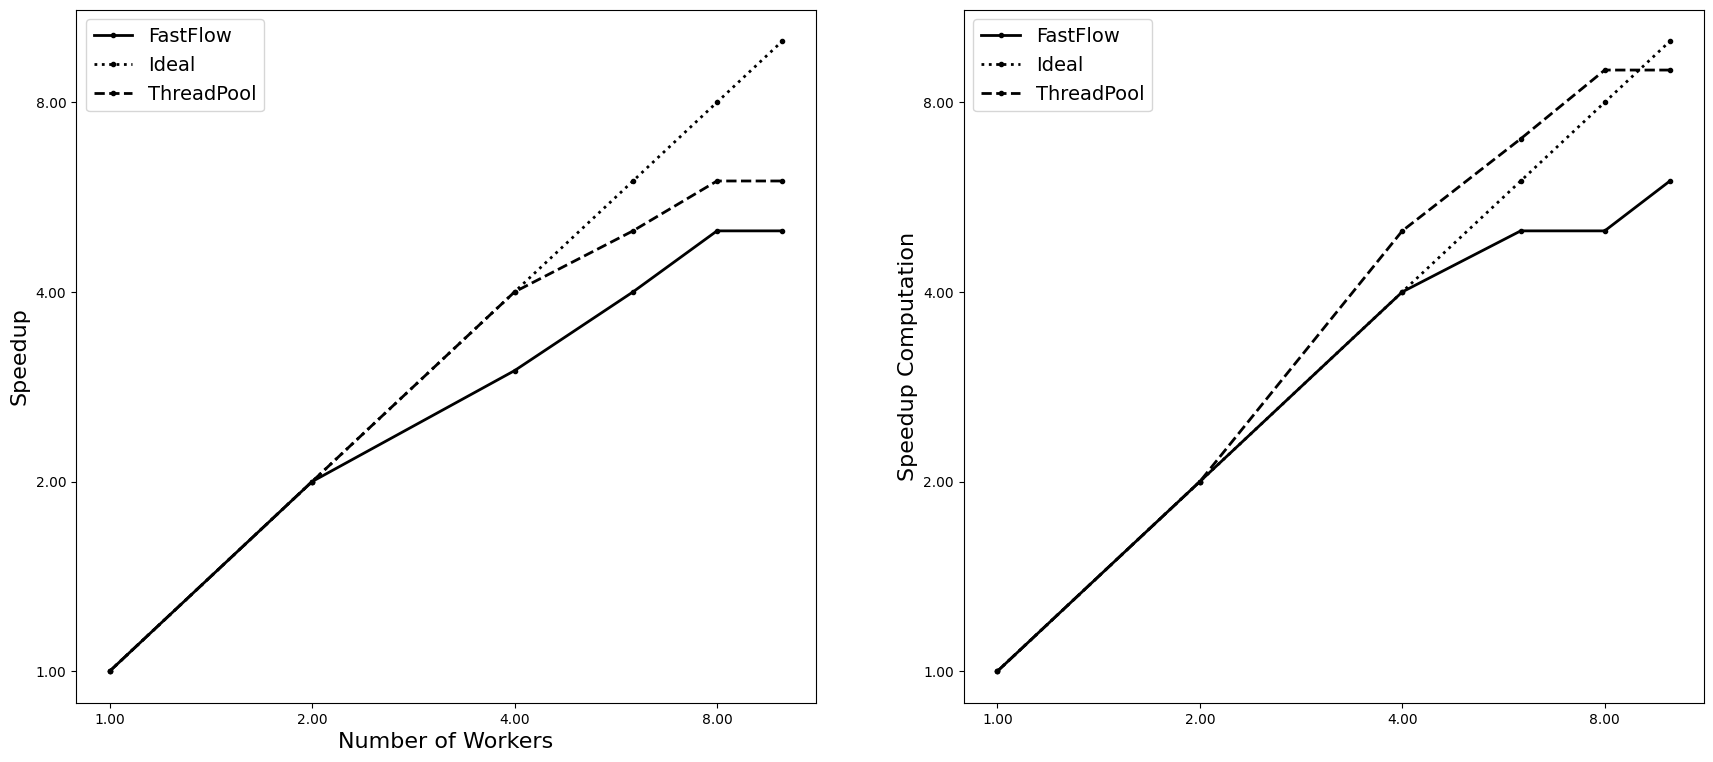

In [481]:
df3 = pd.read_csv(DATA+ '/Results.csv', sep=';')
df3 = df3.iloc[:, :-1]
# Get only test 7
df3 = df3[df3['Test File'] == 'enctest5.bin'].reset_index(drop=True)
# Absolute 
# df3['Ideal'] = Seq5Total/(Seq5Total/df3['Nw'])
# df3['IdealC'] = Seq5Comp/(Seq5Comp/df3['Nw'])
df3['Speedup'] = (Seq5Total/df3['Total']).round(0).astype('int64')
df3['SpeedupC'] = (Seq5Comp/df3['Computation']).round(0).astype('int64') 
df3['File Size'] = (df3['File Size']/1000000).round(0).astype('int64')
df3['Encoding Size'] = (df3['Encoding Size']/1000000).round(0).astype('int64')

# plot speedup for test 7 x = Nw y = Total
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
ax1.set_ylabel("Speedup", color='black', fontsize=16)
ax1.set_xlabel("Number of Workers", color='black', fontsize=16)
ax2.set_ylabel("Speedup Computation", color='black', fontsize=16)

df3FF = df3[df3['Kind'] == 'FastFlow'].reset_index(drop=True)
df3TP = df3[df3['Kind'] == 'ThreadPool'].reset_index(drop=True)
print(df3FF)
# Plot
ax1.plot(df3FF['Nw'], df3FF['Speedup'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], df3TP['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], df3TP['Speedup'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
ax2.plot(df3FF['Nw'], df3FF['SpeedupC'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax2.plot(df3FF['Nw'], df3FF['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax2.plot(df3TP['Nw'], df3TP['SpeedupC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')

# Legend
ax1.legend(fontsize=14, loc='upper left')
ax2.legend(fontsize=14, loc='upper left')
# Ticks
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
# Save
fig.savefig("plots/speedupNw5.png", bbox_inches='tight')
fig.show()
df3

/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/3103073686.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,Kind,Test File,File Size,Encoding Size,Nw,Tasks,Total,Computation,Speedup,SpeedupC,Scalability,ScalabilityC
0,FastFlow,enctest5.bin,1053,560,1,16384,23991454,23144594,1,1,1,1
1,FastFlow,enctest5.bin,1053,560,2,8192,12561793,11742405,2,2,2,2
2,FastFlow,enctest5.bin,1053,560,4,4096,6829163,6078863,3,4,4,4
3,FastFlow,enctest5.bin,1053,560,6,2048,5352265,4625699,4,5,4,5
4,FastFlow,enctest5.bin,1053,560,8,2048,4707195,3971991,5,5,5,6
5,FastFlow,enctest5.bin,1053,560,10,2048,4617023,3888438,5,6,5,6


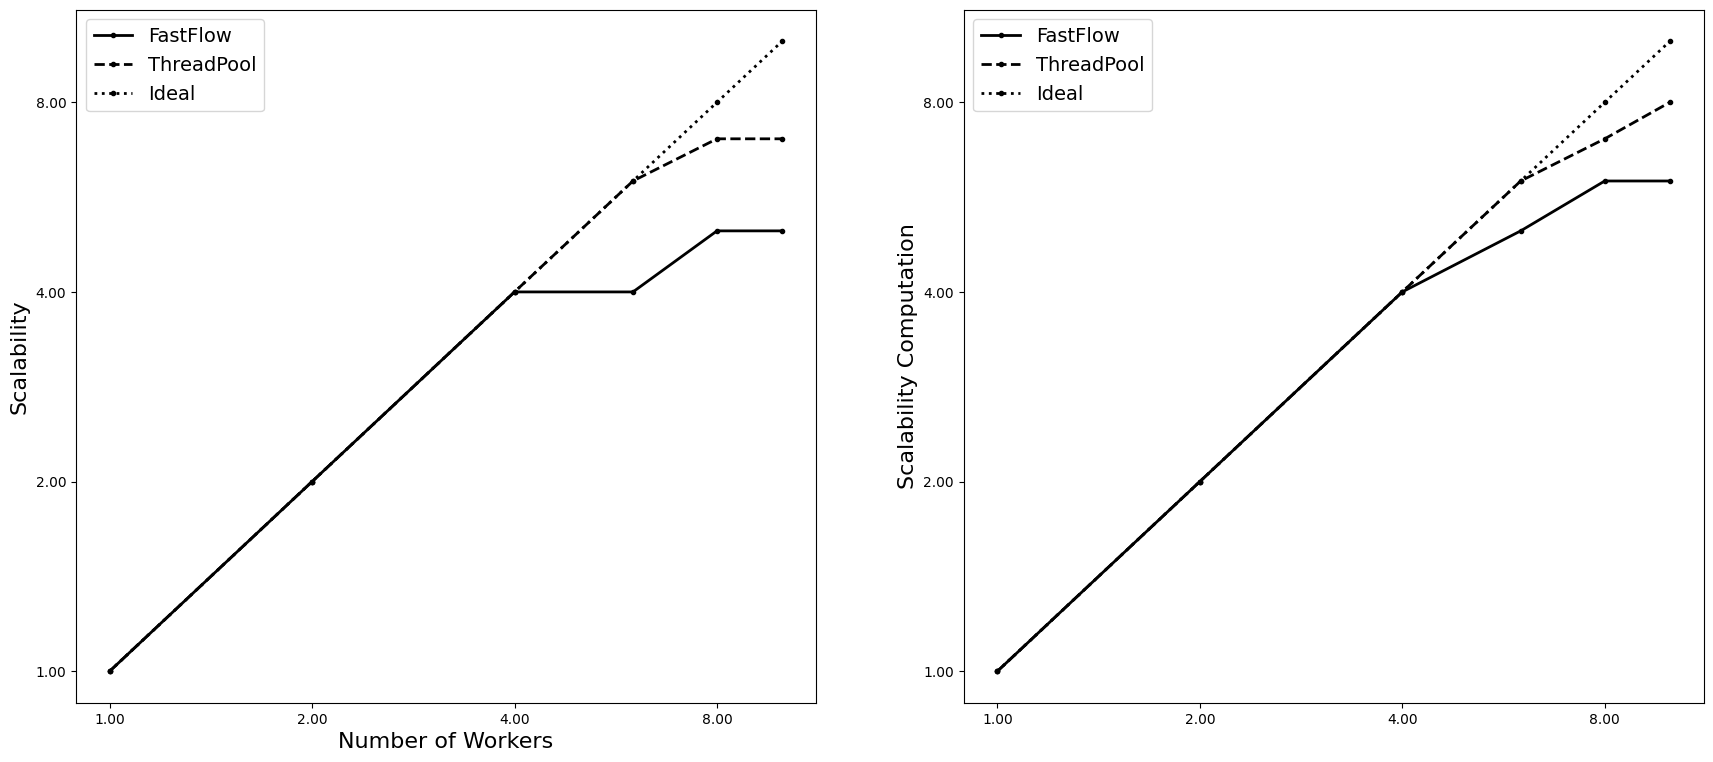

In [482]:
# Get Total of row with 1 nw TP
tpar1TotalTP = df3TP[df3TP['Nw'] == 1]['Total'].to_numpy()[0]
tpar1CompTP = df3TP[df3TP['Nw'] == 1]['Computation'].to_numpy()[0]
# Get Total of row with 1 nw FF
tpar1TotalFF = df3FF[df3FF['Nw'] == 1]['Total'].to_numpy()[0]
tpar1CompFF = df3FF[df3FF['Nw'] == 1]['Computation'].to_numpy()[0]


# Scalability = tpar1 / tparNw
df3TP['Scalability'] = (tpar1TotalTP / df3TP['Total']).round(0).astype('int64')
df3TP['ScalabilityC'] = (tpar1CompTP / df3TP['Computation']).round(0).astype('int64')

# Scalability = tpar1 / tparNw
df3FF['Scalability'] = (tpar1TotalFF / df3FF['Total']).round(0).astype('int64')
df3FF['ScalabilityC'] = (tpar1CompFF / df3FF['Computation']).round(0).astype('int64')

# Plot 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
ax1.set_ylabel("Scalability", color='black', fontsize=16)
ax1.set_xlabel("Number of Workers", color='black', fontsize=16)
ax2.set_ylabel("Scalability Computation", color='black', fontsize=16)

# Plot
ax1.plot(df3FF['Nw'], df3FF['Scalability'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], df3TP['Scalability'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], df3TP['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax2.plot(df3FF['Nw'], df3FF['ScalabilityC'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax2.plot(df3TP['Nw'], df3TP['ScalabilityC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
ax2.plot(df3TP['Nw'], df3TP['Nw'], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')

# Legend
ax1.legend(fontsize=14, loc='upper left')
ax2.legend(fontsize=14, loc='upper left')
# Ticks
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
ax1.set_yscale('log', base=2)
ax2.set_yscale('log', base=2)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
# Save
fig.savefig("plots/scalability.png", bbox_inches='tight')
fig.show()
df3FF

Efficency

/var/folders/41/rclpfg5x1r592h7fgh2xwk5h0000gn/T/ipykernel_66694/3494263273.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


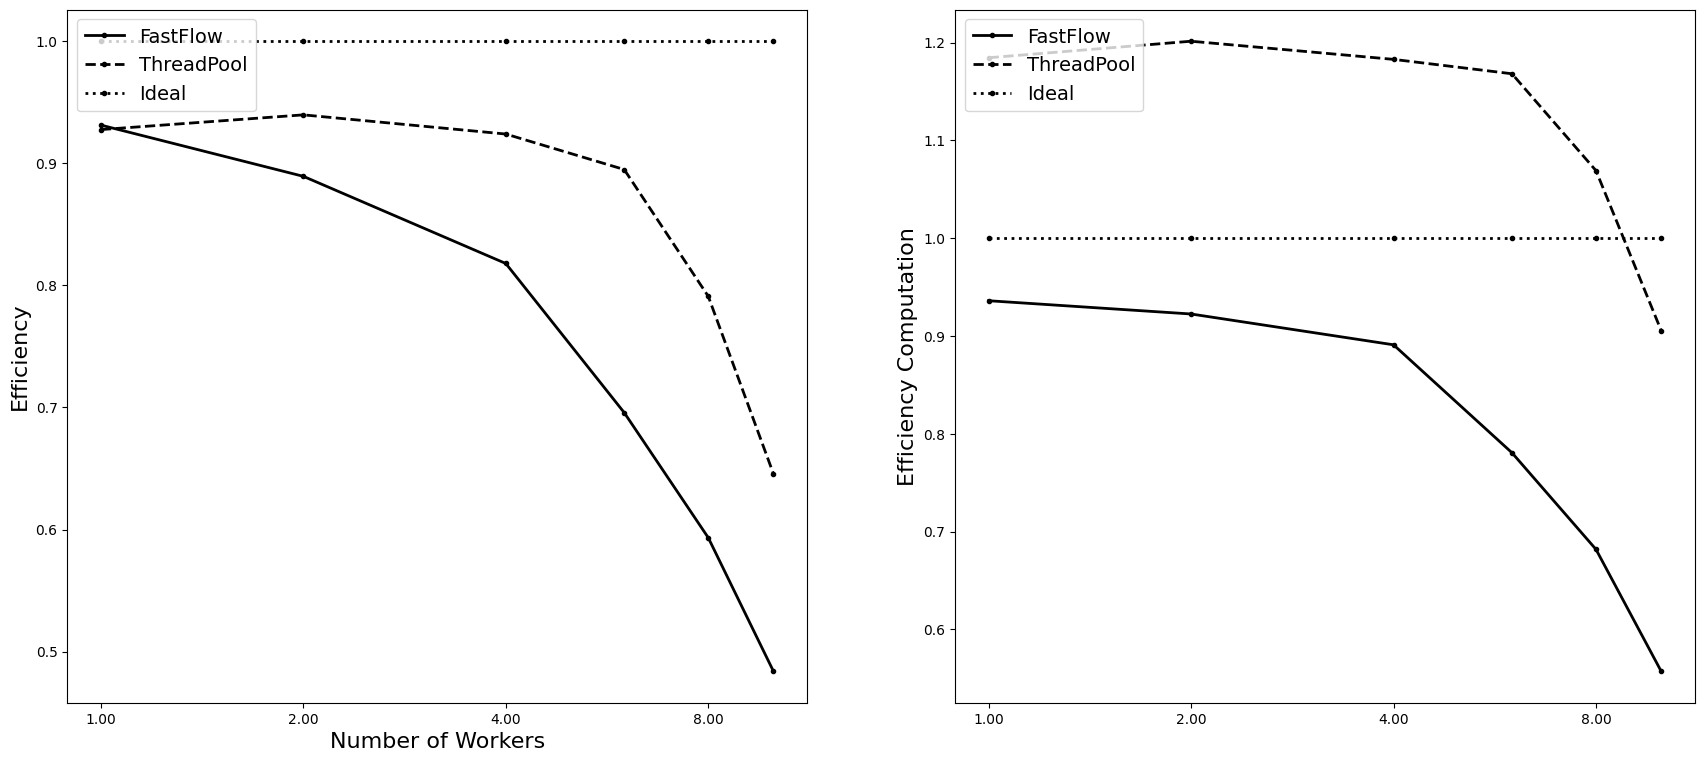

In [483]:
# Plot Ideal/Tpar(n)

df3FF['Ideal'] = (Seq5Total/df3FF['Nw']).round(0).astype('int64')
df3FF['IdealC'] = (Seq5Comp/df3FF['Nw']).round(0).astype('int64')
df3TP['Ideal'] = (Seq5Total/df3TP['Nw']).round(0).astype('int64')
df3TP['IdealC'] = (Seq5Comp/df3TP['Nw']).round(0).astype('int64')
df3TP['Efficiency'] = df3TP['Ideal'] / df3TP['Total']
df3TP['EfficiencyC'] = df3TP['IdealC'] / df3TP['Computation']
df3FF['Efficiency'] = df3FF['Ideal'] / df3FF['Total']
df3FF['EfficiencyC'] = df3FF['IdealC'] / df3FF['Computation']
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 9))
ax1.set_ylabel("Efficiency", color='black', fontsize=16)
ax1.set_xlabel("Number of Workers", color='black', fontsize=16)
ax2.set_ylabel("Efficiency Computation", color='black', fontsize=16)

# Plot
ax1.plot(df3FF['Nw'], df3FF['Efficiency'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], df3TP['Efficiency'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
ax1.plot(df3TP['Nw'], [1, 1, 1, 1, 1, 1], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
ax2.plot(df3FF['Nw'], df3FF['EfficiencyC'], label='FastFlow', color='black', linestyle='solid', linewidth=2, marker='.')
ax2.plot(df3TP['Nw'], df3TP['EfficiencyC'], label='ThreadPool', color='black', linestyle='dashed', linewidth=2, marker='.')
ax2.plot(df3TP['Nw'], [1, 1, 1, 1, 1, 1], label='Ideal', color='black', linestyle='dotted', linewidth=2, marker='.')
# Legend
ax1.legend(fontsize=14, loc='upper left')
ax2.legend(fontsize=14, loc='upper left')
# Ticks
ax1.set_xscale('log', base=2)
ax2.set_xscale('log', base=2)
# ax1.set_yscale('log', base=2)
# ax2.set_yscale('log', base=2)

for axis in [ax1.xaxis, ax1.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
for axis in [ax2.xaxis, ax2.yaxis]:
    axis.set_major_formatter(ScalarFormatter())
# Save
fig.savefig("plots/efficiency.png", bbox_inches='tight')
fig.show()